In [1]:
%load_ext autoreload
%autoreload 2

# Vector Chirped Z-transform (VCZT)


In [2]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 256)

focal = 16 * um
wavelength = 0.6328 * um

In [4]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(32 * um, 32 * um),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)

In [101]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens_cylindrical(x0=0,focal=focal, angle=90*degrees)


In [102]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 1j))

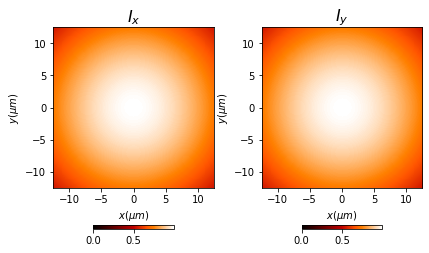

In [103]:
EM1.draw('intensities', logarithm=0)

## to value


In [104]:
x_out = 0.
y_out = 0.
z = focal

In [105]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out, verbose=True)
print(EM2_1D)


((-2.100888571344102+1.588420290649052j), (-1.588420290649052-2.100888571344102j), (3.3306690738754696e-16+5.856426454897701e-15j))
CPU times: user 127 ms, sys: 40.7 ms, total: 167 ms
Wall time: 167 ms


## to x_field


In [106]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.
z = focal

CPU times: user 534 ms, sys: 210 ms, total: 744 ms
Wall time: 433 ms


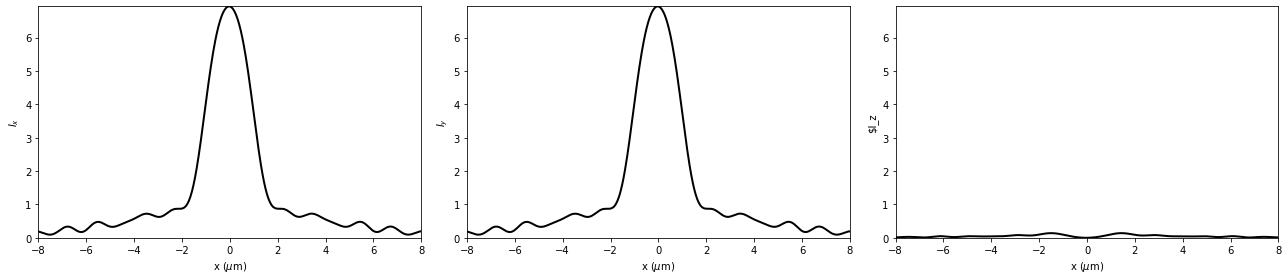

In [107]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
EM2_1D.draw('intensities');

## to z_field


In [127]:
x_out = 0.
y_out = 0.
z = np.linspace(focal - 10 * um, focal + 4 * um, 64)

In [125]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=False);


CPU times: user 6.38 s, sys: 1.49 s, total: 7.87 s
Wall time: 7.87 s


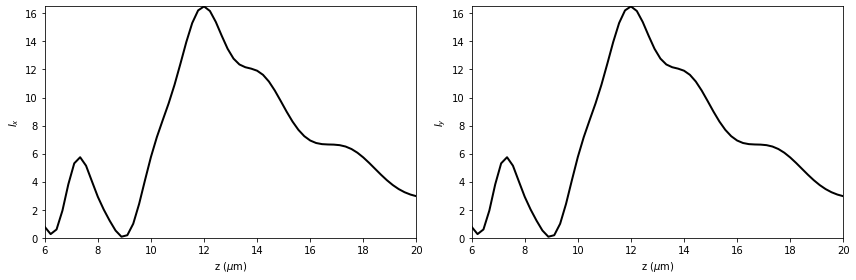

In [126]:
EM2.draw('intensities')

## to XZ_field


In [111]:
size_out = 5 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 128)
y_out = 0.
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 64)

In [112]:
%%time
EM2=EM1.CZT(z, x_out, y_out)

CPU times: user 5.15 s, sys: 1.39 s, total: 6.54 s
Wall time: 6.54 s


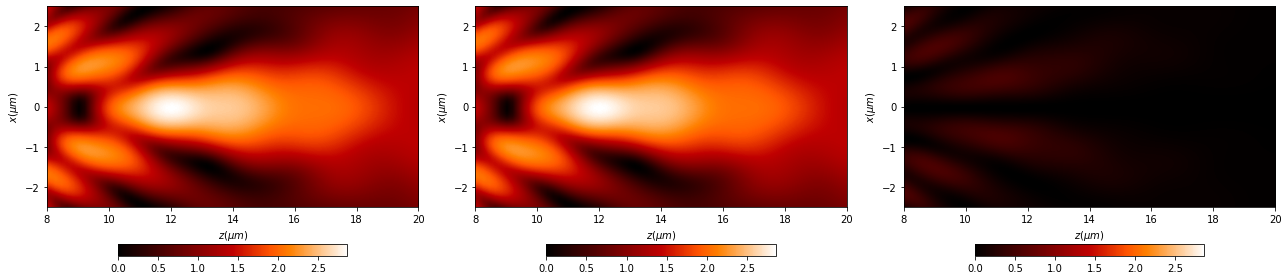

In [113]:
EM2.draw('intensities', logarithm=1e0)

## to XY_field


In [114]:
size_out = 3 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 128)
y_out = np.linspace(-size_out / 2, size_out / 2, 256)
z = focal - 3*um

In [115]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 150 ms, sys: 16.5 ms, total: 167 ms
Wall time: 166 ms


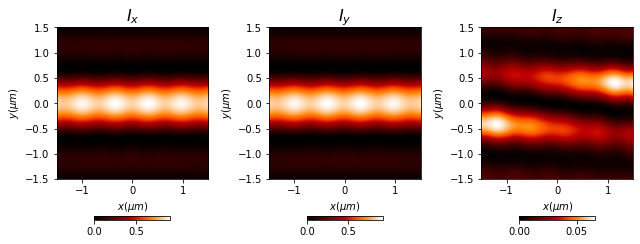

In [116]:
EM2.draw('intensities', logarithm=1e-1)

## to XYZ_field


In [117]:
size_out = 2 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 32)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)

In [118]:
%%time
EM2=EM1.CZT(z, x_out, y_out)

# TODO: need to implement Vector_field_XYZ
CPU times: user 1.4 s, sys: 244 ms, total: 1.65 s
Wall time: 1.65 s


<Figure size 432x288 with 0 Axes>

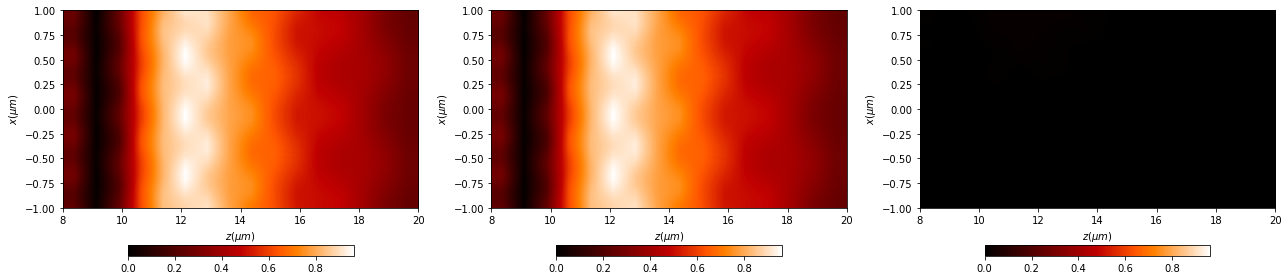

In [119]:
EM2.draw_XZ('intensities', y0=0, logarithm=1e-1)

<Figure size 432x288 with 0 Axes>

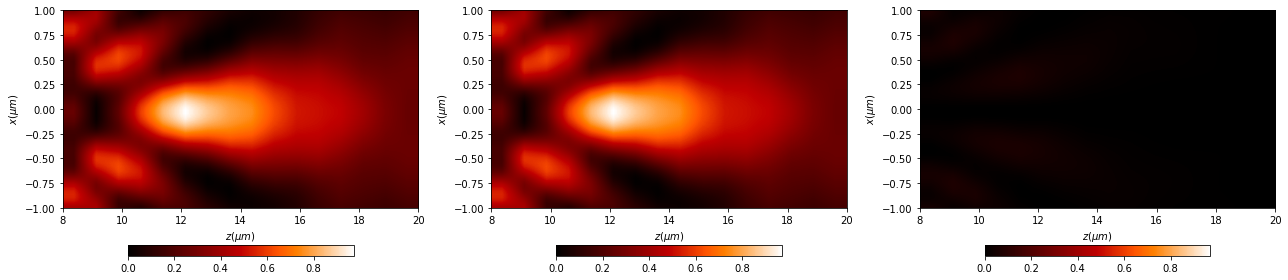

In [120]:
EM2.draw_YZ('intensities', x0=0, logarithm=1e-1)